In [105]:
import torch
from torch.utils.data import DataLoader, TensorDataset
#from torchviz import make_dot
from twilio.rest import Client  
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import seaborn as sns

In [106]:
# Increase the maximum number of columns displayed to all (None)
pd.set_option('display.max_columns', None)

# Increase the maximum number of rows displayed to all (None)
pd.set_option('display.max_rows', None)

# Increase the maximum number of elements displayed from sequences like lists within DataFrames (None)
pd.set_option('display.max_seq_items', None)

In [107]:
# reads a comma-separated values (CSV) file named Train_data.csv located in the directory checks
df = pd.read_csv('checks/Train_data.csv') 
df.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0           1.00           0.00                0.00             150   
1           0.08           0.15                0.00             255   
2           0.05           0.07                0.00             255   
3           1.00           0.00                0.00              30   
4           1.00           0.00                0.09             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1                   1                    0.00                    0.60   
2                  26                    0.10                    0.05   
3                 255                    1.00                    0.00   
4                 255                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_hos

In [108]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [109]:
df.shape

(25192, 42)

<Axes: xlabel='class', ylabel='count'>

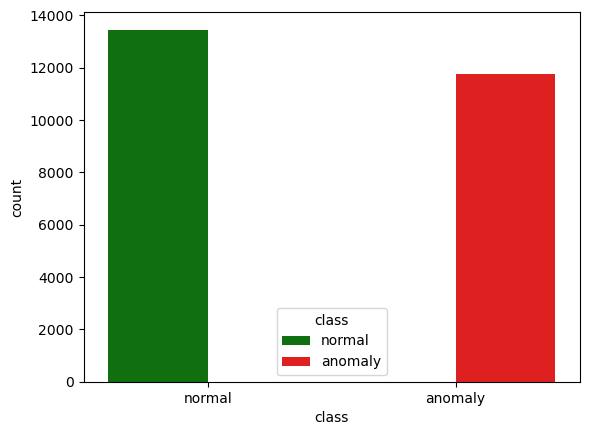

In [110]:
sns.countplot(x=df['class'], palette=['green', 'red'], hue=df['class'])

In [111]:
# Transform class label to binary column (0: normal, 1: anomaly)
df['class'] = df['class'].apply(lambda x: 0 if x=="normal" else 1)

/home/checks/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

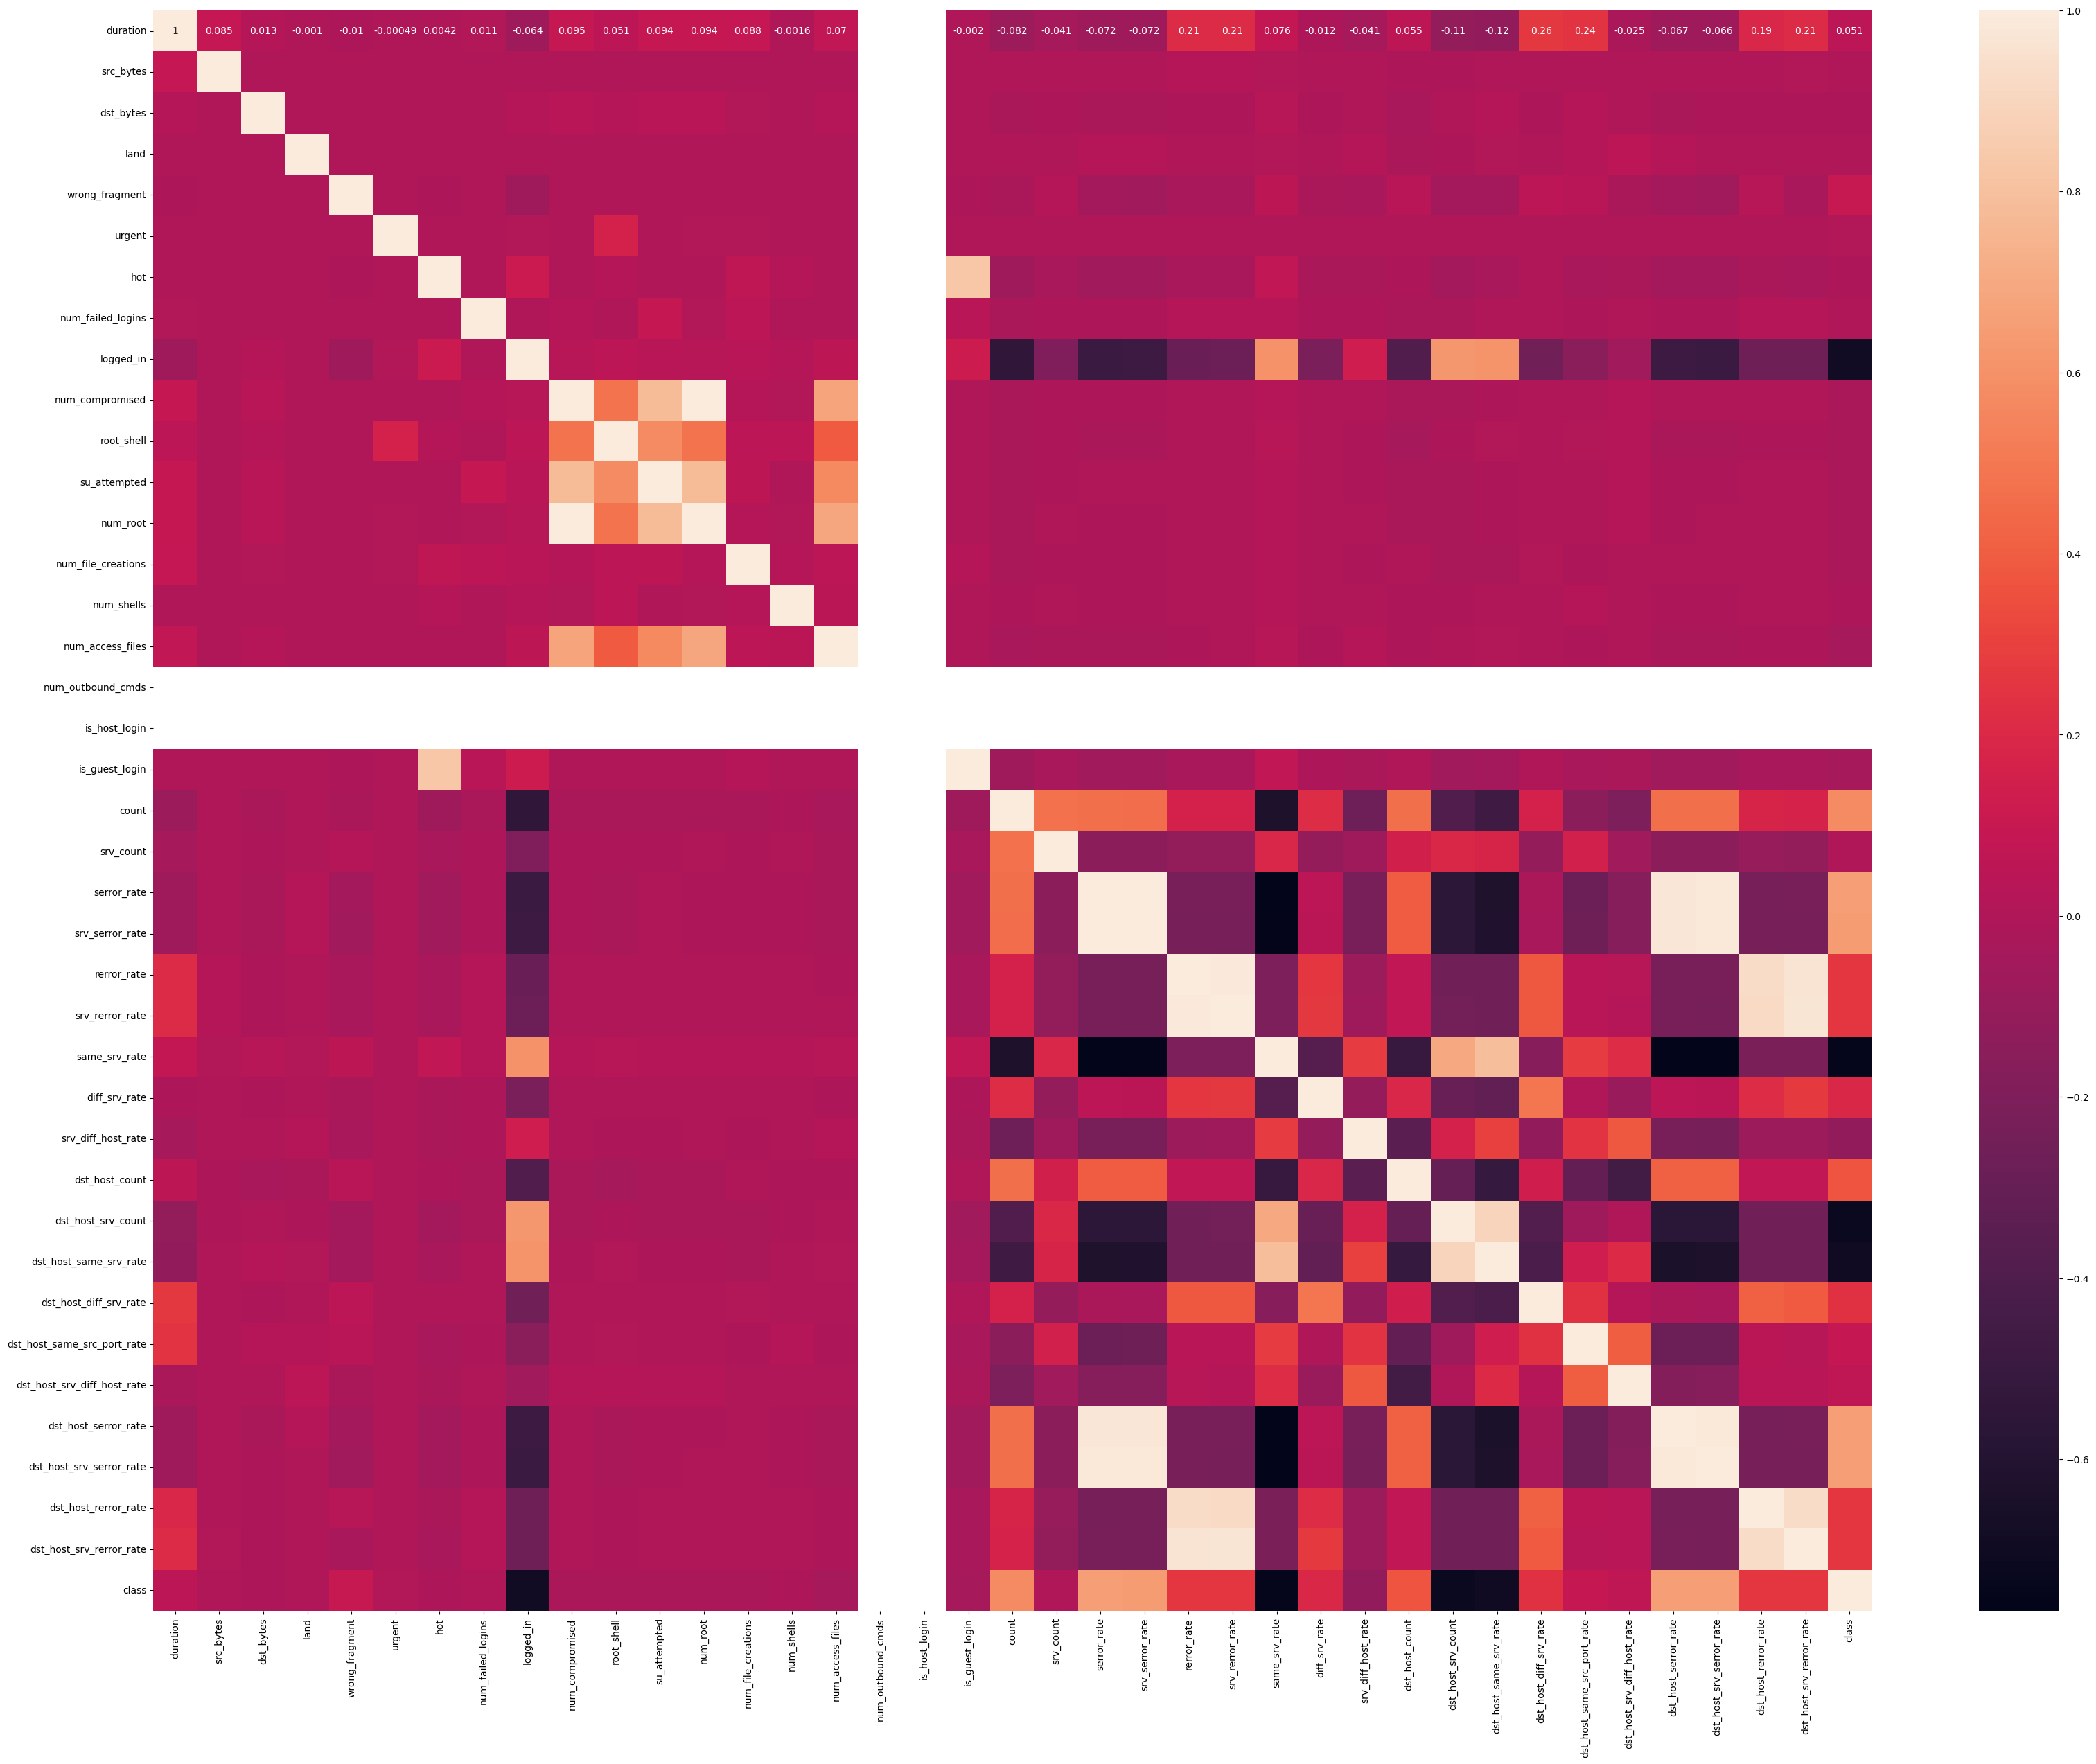

In [112]:
categorical_columns = ['protocol_type', 'service', 'flag']
plt.figure(figsize=(40,30))
sns.heatmap(df.drop(categorical_columns, axis=1).corr(), annot=True)


Text(0, 0.5, 'Destination Host Name Server Rate')

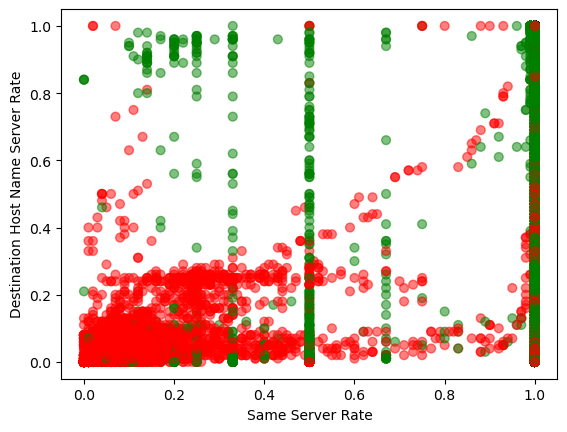

In [113]:
labels = df['class'].apply(lambda x: 0 if x=="normal" else 1)
labels = df['class']
colors = ['green','red']
y = df['dst_host_same_srv_rate']
x = df['same_srv_rate']
plt.scatter(x,y, c=labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5, s=40)
plt.xlabel("Same Server Rate")
plt.ylabel("Destination Host Name Server Rate")

In [114]:
df = df.join(pd.get_dummies(df.loc[:, categorical_columns]))
df = df.drop(categorical_columns, axis=1)


In [115]:
df.describe()


duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.488811   
min        0.00000      0.000000           0.000000      0.000000   
25%        0.00000      0.000000           0.000000      0.000000   
50%        0.00000      0.000000           0.000000      0.000000   
75%        0.00000      0.000000           0.000000      1.000000   
max        1.00000     77.000000           4.000000      1.000000   

       num_compromised    root_shell  su_attempted      num_root  \
count     25192.000000  25192.000000  25192.000000  25192.000000   
mean          0.227850      0.001548      0.001350      0.249841   
std          10.417352      0.039316      0.048785     11.500842   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max         884.000000      1.000000      2.000000    975.000000   

       num_file_creations    num_shells  num_access_files  num_outbound_cmds  \
count        25192.000000  25192.000000      25192.000000            25192.0   
mean             0.014727      0.000357          0.004327                0.0   
std              0.529602      0.018898          0.098524                0.0   
min              0.000000      0.000000          0.000000                0.0   
25%              0.000000      0.000000          0.000000                0.0   
50%              0.000000      0.000000          0.000000                0.0   
75%              0.000000      0.000000          0.000000                0.0   
max             40.000000      1.000000          8.000000                0.0   

       is_host_login  is_guest_login         count     srv_count  \
count        25192.0    25192.000000  25192.000000  25192.000000   
mean             0.0        0.009130     84.591180     27.698754   
std              0.0        0.095115    114.673451     72.468242   
min              0.0        0.000000      1.000000      1.000000   
25%              0.0        0.000000      2.000000      2.000000   
50%              0.0        0.000000     14.000000      8.000000   
75%              0.0        0.000000    144.000000     18.000000   
max              0.0        1.000000    511.000000    511.000000   

        serror_rate  srv_serror_rate   rerror_rate  srv_rerror_rate  \
count  25192.000000     25192.000000  25192.000000     25192.000000   
mean       0.286338         0.283762      0.118630         0.120260   
std        0.447312         0.447599      0.318745         0.322335   
min        0.000000         0.000000      0.000000         0.000000   
25%        0.000000         0.000000      0.000000         0.000000   
50%        0.000000         0.000000      0.000000         0.000000   
75%        1.000000         1.000000      0.000000         0.000000   
max        1.000000         1.000000      1.000000         1.000000   

       same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count 

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['class'], axis=1), df['class'], test_size=0.2, random_state=12)
print("Shape of the training input X:", X_train.shape)
print("Shape of the training output y:", y_train.shape)
print("Shape of the testing input X:", X_test.shape)
print("Shape of the testing output y:", y_test.shape)

Shape of the training input X: (20153, 118)
Shape of the training output y: (20153,)
Shape of the testing input X: (5039, 118)
Shape of the testing output y: (5039,)


In [117]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [118]:
pca = PCA(n_components = 10)

X_train_PCA = pca.fit_transform(X_train_norm)
X_test_PCA = pca.transform(X_test_norm)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.0834838 , 0.05251576, 0.03534561, 0.03201952, 0.02585129,
       0.02270663, 0.01908128, 0.0151329 , 0.01358665, 0.01216968])

<Axes: >

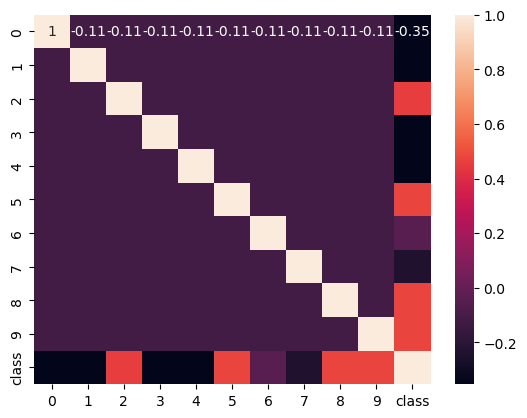

In [119]:
df_PCA = pd.DataFrame(X_train_PCA).corr()
df_PCA['class'] = y_train
sns.heatmap(df_PCA.corr(), annot=True)

In [120]:
x = list(map(lambda x: x[0], X_train_PCA))
y = list(map(lambda x: x[1], X_train_PCA))
z = list(map(lambda x: x[2], X_train_PCA))

Text(0, 0.5, 'Second PCA Component')

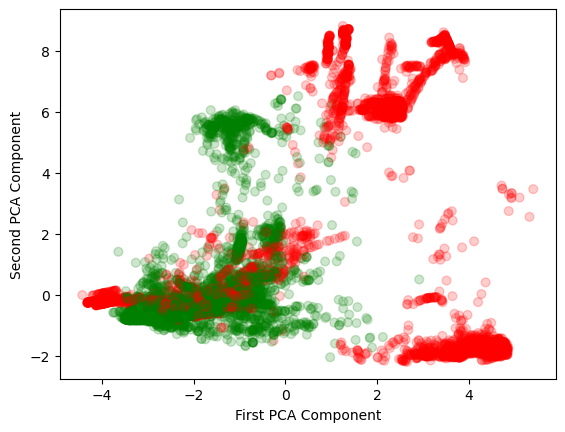

In [121]:
labels = y_train
colors = matplotlib.colors.ListedColormap(['green','red'])
plt.scatter(x,y, c=labels, cmap=colors, alpha=0.2, s=40)
plt.xlabel("First PCA Component")
plt.ylabel("Second PCA Component")

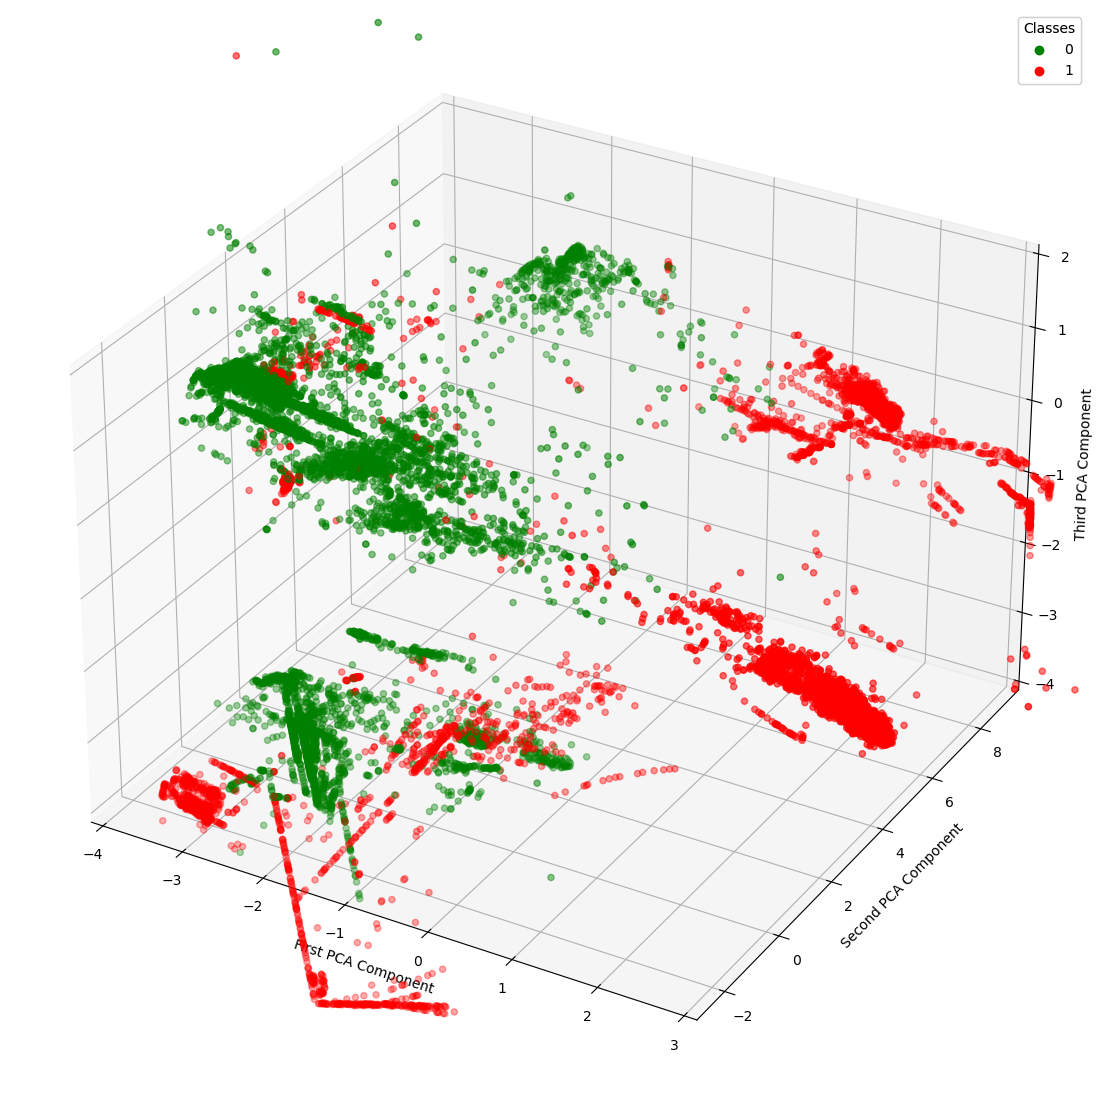

In [122]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')
labels = y_train

# Creating plot
scatter = ax.scatter3D(x, y, z, c=labels, cmap=colors)
ax.set_zlim(-4,2)
ax.set_xlim(-4,3)
ax.set_xlabel("First PCA Component")
ax.set_ylabel("Second PCA Component")
ax.set_zlabel("Third PCA Component")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.show()

In [76]:
#Define helpful function to use throughout our analysis to print the error metrics¶

def print_error_metrics(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    prc = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    print('Accuracy: {:.5f}'.format(acc))
    print('Precision: {:.5f}'.format(prc))
    print('F1 Score: {:.5f}'.format(f1))

In [77]:
#Training logistic regression models¶
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None)
#regressor = LogisticRegression(max_iter=100, penalty='none')
regressor.fit(X_train_PCA, y_train)
y_pred = regressor.predict(X_test_PCA)
print_error_metrics(y_test, y_pred)


Accuracy: 0.95555
Precision: 0.96476
F1 Score: 0.95135


In [78]:
regressor = LogisticRegression(max_iter=400, solver='saga', penalty='elasticnet', l1_ratio=0.5)
regressor.fit(X_train_PCA, y_train)
y_pred = regressor.predict(X_test_PCA)
print_error_metrics(y_test, y_pred)

Accuracy: 0.95555
Precision: 0.96476
F1 Score: 0.95135


In [79]:
# Training Decision Trees models¶
# We will train an unregularized and regularized (maximum depth of five) decision tree models. 
# We will also visualize their decision tree (with red nodes being anomalous and green ones benign).
dtree = DecisionTreeClassifier(max_depth=None)
dtree.fit(X_train_PCA, y_train)
print("Decision tree maximum depth:", dtree.tree_.max_depth)
y_pred = dtree.predict(X_test_PCA)
print_error_metrics(y_test, y_pred)



Decision tree maximum depth: 20
Accuracy: 0.98849
Precision: 0.98841
F1 Score: 0.98756


In [80]:
from matplotlib.colors import to_rgb

features = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']
fig = plt.figure(figsize=(100,90))
class_colors=['green', 'red']
artists = plot_tree(dtree, feature_names=features, class_names=['Normal', 'Anomaly'], filled=True, rounded=True, fontsize=10)
for artist, impurity, value in zip(artists, dtree.tree_.impurity, dtree.tree_.value):
    r, g, b = to_rgb(class_colors[np.argmax(value)])
    f = impurity * 2
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')
fig.savefig('decision_tree_1.png')

In [81]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train_PCA, y_train)
print("Decision tree maximum depth:", dtree.tree_.max_depth)
y_pred = dtree.predict(X_test_PCA)
print_error_metrics(y_test, y_pred)

Decision tree maximum depth: 5
Accuracy: 0.97301
Precision: 0.97453
F1 Score: 0.97075


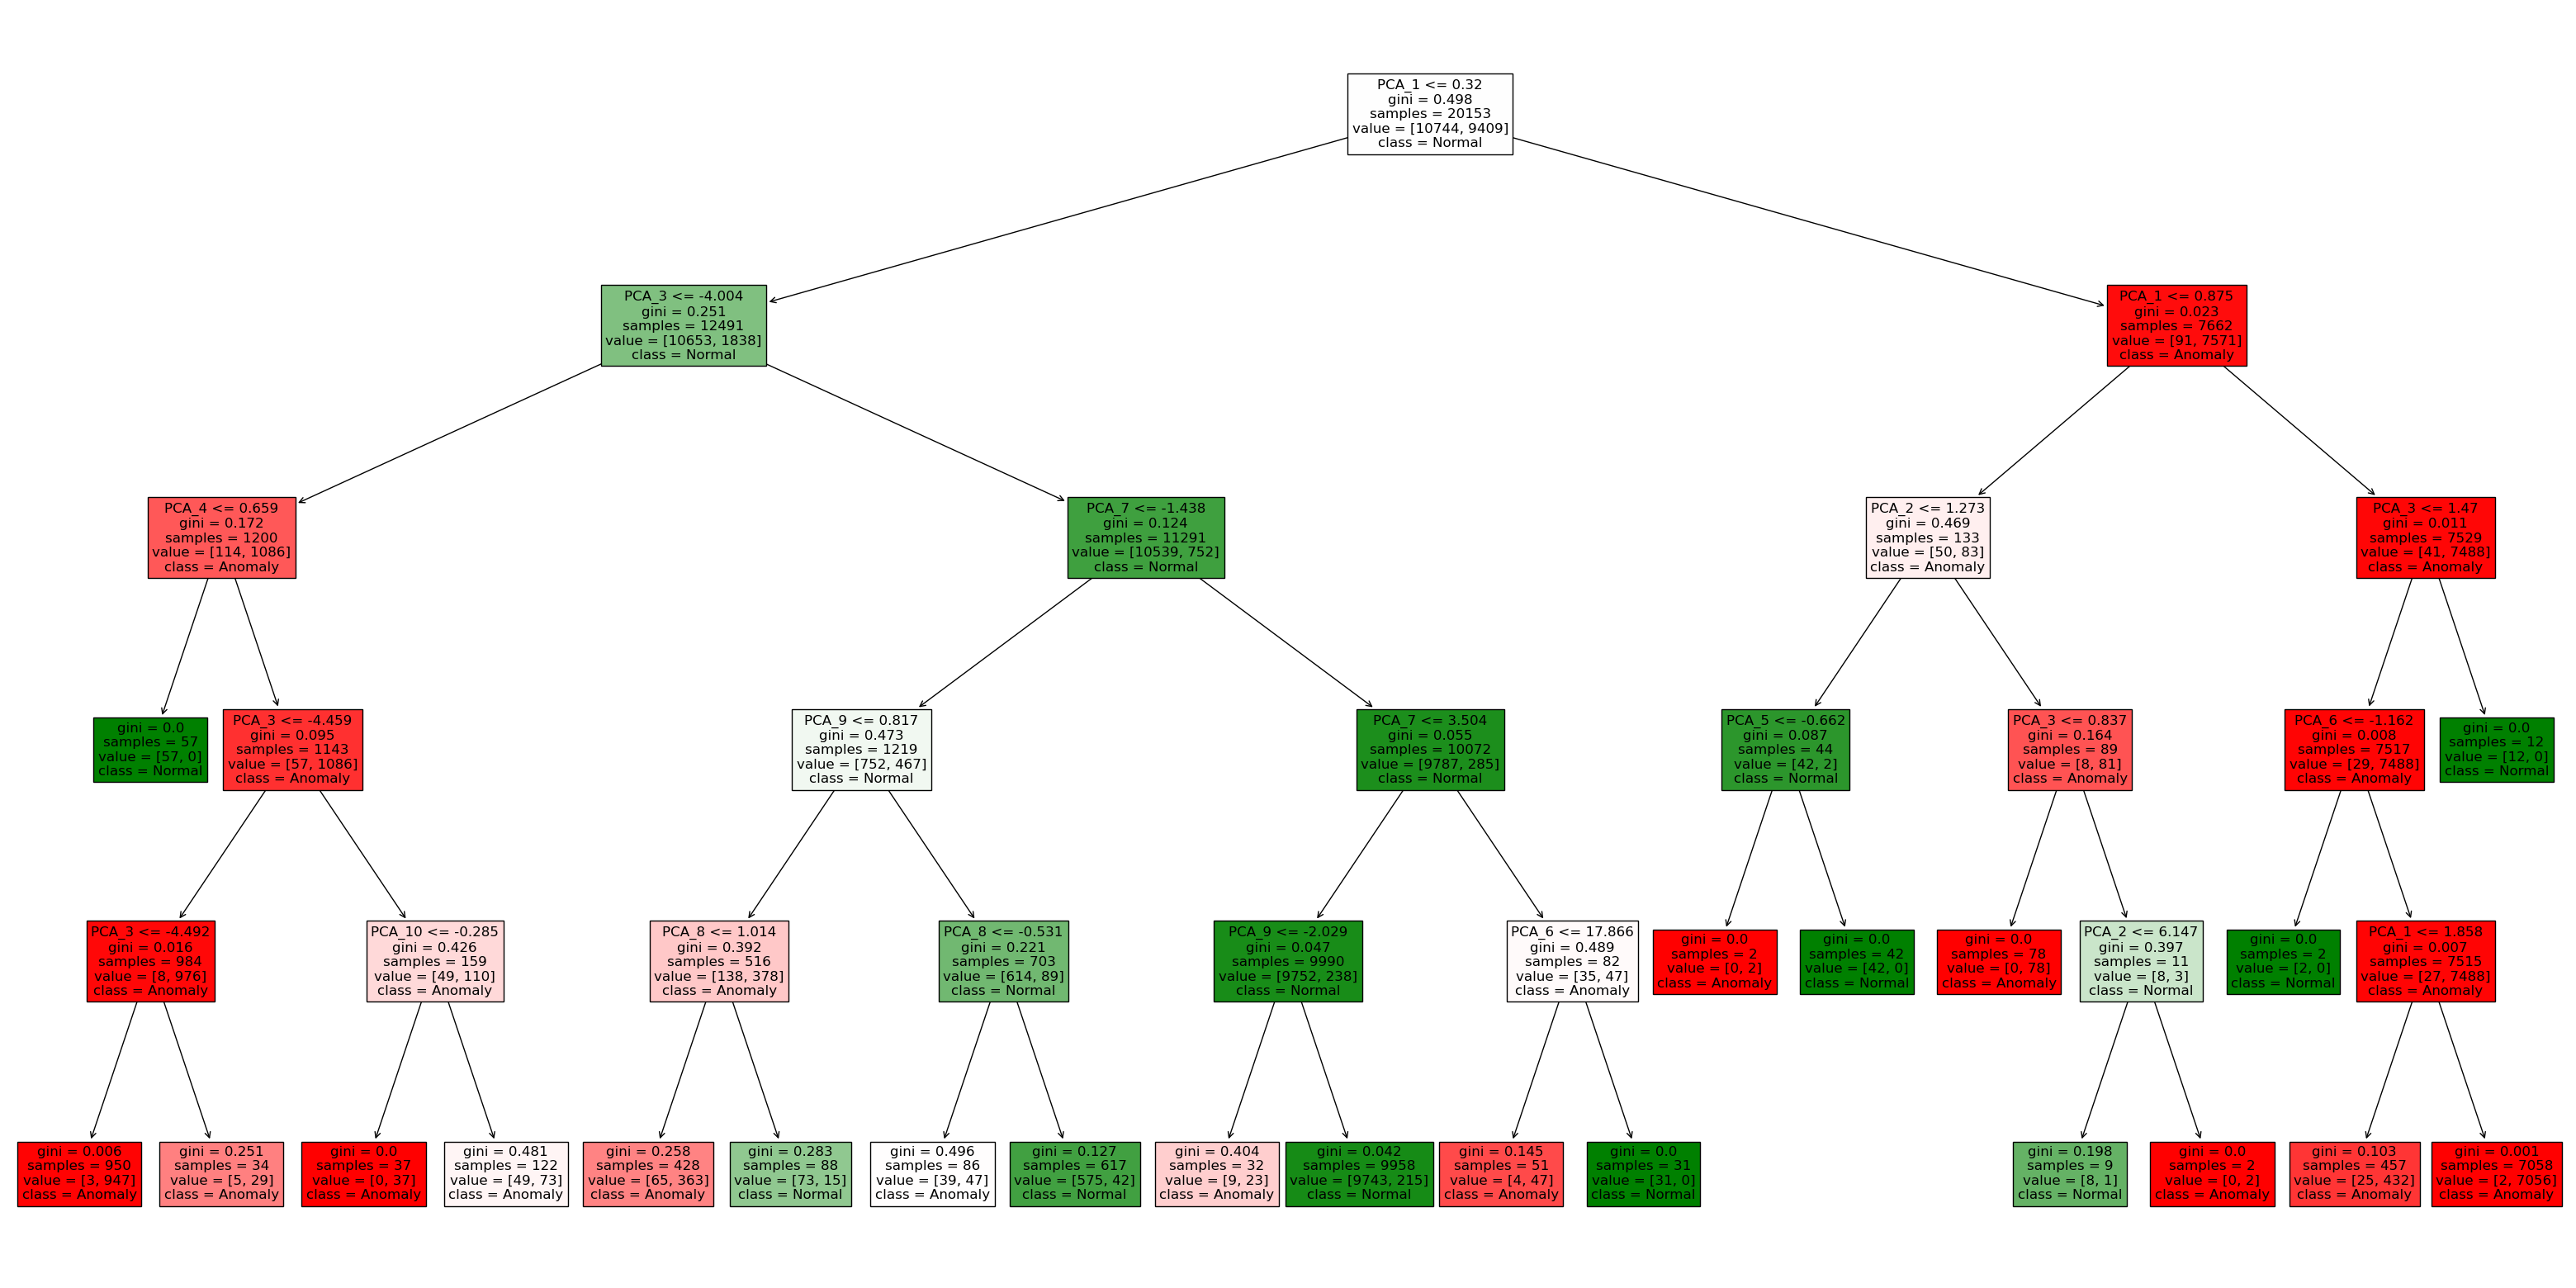

In [82]:
features = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']
fig = plt.figure(figsize=(40,20))
artists = plot_tree(dtree, feature_names=features, class_names=['Normal', 'Anomaly'], filled=True, fontsize=12)
for artist, impurity, value in zip(artists, dtree.tree_.impurity, dtree.tree_.value):
    r, g, b = to_rgb(class_colors[np.argmax(value)])
    f = impurity * 2
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')
fig.savefig('decision_tree_2.png')

In [83]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(118, 20)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(20, 10)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(10, 1)
        self.sigm = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigm(x)
        return x

In [84]:
model = SimpleNN()

In [85]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [86]:
dataset = TensorDataset(torch.from_numpy(X_train_norm).type(torch.float), torch.from_numpy(y_train.to_numpy()).type(torch.float))
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [87]:
X_test_DNN = torch.from_numpy(X_test_norm).type(torch.float)
y_test_DNN = torch.from_numpy(y_test.to_numpy()).type(torch.float)


In [88]:
#make_dot(model(X_test_DNN[0]), params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")


In [89]:
epochs = 20
loss_value = 0.0
train_loss = []
test_loss = []
for epoch in range(epochs):
    model.train()
    i = 0
    for _batch_idx, (features, labels) in enumerate(tqdm(train_loader)):
        i += 1
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(features).squeeze()
        # print(outputs, labels)
        # Calculate the loss
        # print(outputs, labels, criterion(outputs, labels))
        # break
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        loss_value += loss.item()
    train_loss.append(loss_value/i)
    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test_DNN).squeeze()
        test_loss_val = criterion(test_pred, y_test_DNN).item()
        test_loss.append(test_loss_val)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss_value/i:.10f}, Test Loss: {test_loss_val:.10f}')
    loss_value = 0.0
print(train_loss)

100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1088.91it/s]


Epoch 1/20, Training Loss: 0.2024221796, Test Loss: 0.0807122588


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 633.12it/s]


Epoch 2/20, Training Loss: 0.0706712416, Test Loss: 0.0597535148


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 635.54it/s]


Epoch 3/20, Training Loss: 0.0528896833, Test Loss: 0.0456343554


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1211.68it/s]


Epoch 4/20, Training Loss: 0.0405867402, Test Loss: 0.0371031426


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 644.88it/s]


Epoch 5/20, Training Loss: 0.0324956728, Test Loss: 0.0300480165


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 641.62it/s]


Epoch 6/20, Training Loss: 0.0261366053, Test Loss: 0.0243949722


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 584.94it/s]


Epoch 7/20, Training Loss: 0.0228915043, Test Loss: 0.0228577834


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 646.22it/s]


Epoch 8/20, Training Loss: 0.0213656296, Test Loss: 0.0229161903


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 647.82it/s]


Epoch 9/20, Training Loss: 0.0197910950, Test Loss: 0.0199745689


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 653.17it/s]


Epoch 10/20, Training Loss: 0.0190677979, Test Loss: 0.0199365746


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1454.05it/s]


Epoch 11/20, Training Loss: 0.0175845404, Test Loss: 0.0190975666


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1143.43it/s]


Epoch 12/20, Training Loss: 0.0171672829, Test Loss: 0.0209789127


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1405.24it/s]


Epoch 13/20, Training Loss: 0.0167520534, Test Loss: 0.0193965640


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1397.51it/s]


Epoch 14/20, Training Loss: 0.0162445936, Test Loss: 0.0195813142


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1371.18it/s]


Epoch 15/20, Training Loss: 0.0154962843, Test Loss: 0.0185534731


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1203.13it/s]


Epoch 16/20, Training Loss: 0.0143951468, Test Loss: 0.0186681263


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1446.02it/s]


Epoch 17/20, Training Loss: 0.0147033874, Test Loss: 0.0163123887


100%|███████████████████████████████████████| 315/315 [00:00<00:00, 1516.46it/s]


Epoch 18/20, Training Loss: 0.0140981217, Test Loss: 0.0179026574


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 778.38it/s]


Epoch 19/20, Training Loss: 0.0134907965, Test Loss: 0.0166191608


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 624.33it/s]

Epoch 20/20, Training Loss: 0.0131937633, Test Loss: 0.0168279167
[0.20242217963650114, 0.0706712415530568, 0.052889683269082555, 0.040586740182830934, 0.03249567275061198, 0.026136605273045246, 0.02289150430865231, 0.02136562962347405, 0.01979109495111357, 0.01906779785973153, 0.017584540443550352, 0.017167282916419762, 0.0167520533991693, 0.016244593642130937, 0.015496284250975661, 0.014395146849641433, 0.0147033873511227, 0.014098121725010782, 0.013490796521248754, 0.0131937633068966]


In [90]:
#print('Training time')
#print((end-start))

<function matplotlib.pyplot.show(close=None, block=None)>

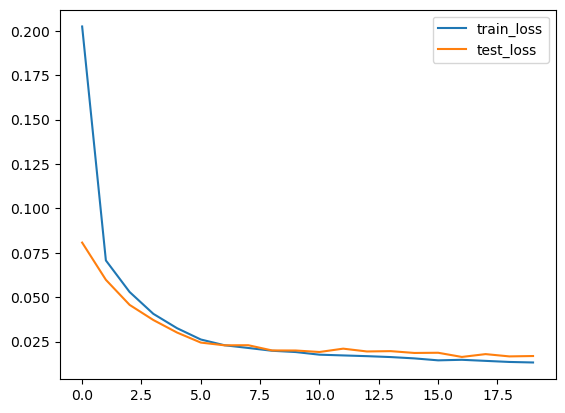

In [91]:
# Visualize the learning curve¶

#We see that the testing loss fluctuates and increases slightly beyond the fifth epoch while the training loss is decreasing. 
#So, we employ early stopping to stop the model at epoch 5.
plt.plot(train_loss, label='train_loss')
plt.plot(test_loss,label='test_loss')
plt.legend()
plt.show




In [92]:
model = SimpleNN()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5
loss_value = 0.0
train_loss = []
test_loss = []
for epoch in range(epochs):
    model.train()
    i = 0
    for _batch_idx, (features, labels) in enumerate(tqdm(train_loader)):
        i += 1
        optimizer.zero_grad()
        outputs = model(features).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_value += loss.item()
    train_loss.append(loss_value/i)

    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test_DNN).squeeze()
        test_loss_val = criterion(test_pred, y_test_DNN).item()
        test_loss.append(test_loss_val)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss_value/i:.10f}, Test Loss: {test_loss_val:.10f}')
    loss_value = 0.0
print(train_loss)

100%|████████████████████████████████████████| 315/315 [00:00<00:00, 670.43it/s]


Epoch 1/5, Training Loss: 0.2237917430, Test Loss: 0.0804735497


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 650.36it/s]


Epoch 2/5, Training Loss: 0.0691328021, Test Loss: 0.0563067012


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 642.22it/s]


Epoch 3/5, Training Loss: 0.0504642617, Test Loss: 0.0445864759


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 637.58it/s]


Epoch 4/5, Training Loss: 0.0393761717, Test Loss: 0.0381655097


100%|████████████████████████████████████████| 315/315 [00:00<00:00, 645.87it/s]

Epoch 5/5, Training Loss: 0.0330611524, Test Loss: 0.0313362405
[0.22379174299597268, 0.06913280211507328, 0.05046426167504655, 0.03937617168421783, 0.033061152352537544]


In [93]:
model.eval()
with torch.inference_mode():
    # 1. Forward pass
    test_pred = model(X_test_DNN).squeeze()

    # 2. Caculate loss/accuracy
    test_loss = criterion(test_pred, y_test_DNN)
    # test_acc = metrics.accuracy_score(y_test, test_pred)
    y_pred = []
    for pred in test_pred:
        if pred>0.5: y_pred.append(1)
        else: y_pred.append(0)
    print_error_metrics(y_test_DNN, y_pred)

Accuracy: 0.98829
Precision: 0.98674
F1 Score: 0.98737
